In [93]:
#THIS IS A TEST FOR STATIC CASE -- NOT INDICATIVE OF MOBILE CASES

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [94]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

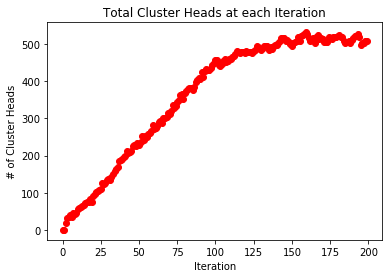

In [95]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [96]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))
    
fig = plt.figure()
hist = plt.hist(data[0])

In [97]:
#num =0
#animation = animation.FuncAnimation(fig, update_hist, 200, fargs=(num) )
#HTML(animation.to_html5_video())

In [98]:
count = 0
total_nodes = 2000
print("Iteration\t\t    ClusterSize Freq\t\t\tNodes in Cluster\tCluster Heads\t  No Cluster")
#print("\t         \t    0   1   2   3   4   5   6   7   8")
for row in data:
    
    cluster_nodes = 0
    cluster_heads = 0
    count_array = np.bincount(row) 
    for i in range(0,len(count_array)):
        cluster_heads = cluster_heads + count_array[i]
        cluster_nodes = cluster_nodes + count_array[i]*(i+1)
    
    print("  ",count,"\t\t",np.bincount(row),"\t\t    ",cluster_nodes-cluster_heads,"\t\t  ",cluster_heads,"\t\t   ",total_nodes-cluster_nodes)
    count = count+1

Iteration		    ClusterSize Freq			Nodes in Cluster	Cluster Heads	  No Cluster
   0 		 [] 		     0 		   0 		    2000
   1 		 [] 		     0 		   0 		    2000
   2 		 [19] 		     0 		   19 		    1981
   3 		 [26  5  0  1] 		     8 		   32 		    1960
   4 		 [23  3  2  3  3] 		     28 		   34 		    1938
   5 		 [27  1  2  2  2  3  1  1] 		     47 		   39 		    1914
   6 		 [20  1  2  1  1  4  1  2  2] 		     68 		   34 		    1898
   7 		 [30  1  0  2  0  4  3  2  3] 		     83 		   45 		    1872
   8 		 [23  4  3  0  1  2  3  1  7] 		     105 		   44 		    1851
   9 		 [21  5  3  2  1  0  2  1 10] 		     120 		   45 		    1835
   10 		 [29  3  3  3  4  1  0  0 12] 		     135 		   55 		    1810
   11 		 [27  6  2  3  2  3  2  4  9] 		     154 		   58 		    1788
   12 		 [27  6  3  3  4  3  1  2 12] 		     168 		   61 		    1771
   13 		 [26  9  2  7  2  1  1  3 14] 		     186 		   65 		    1749
   14 		 [27  5  3  4  8  1  1  2 15] 		     200 		   66 		    1734
   15 		 [30  7  4  7  3  2  1  

In [99]:
numCH = [None]*200
with open("Log-cluster_messages.txt") as csv_file:
    msg_data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in msg_data:
        for i in range(0,len(row)):
            row[i] = int(row[i])

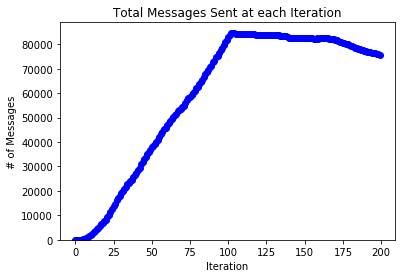

In [100]:
msg_clean = [x[:] for x in [[0] * 200] * 2]

for i in range(0,2):
    for j in range(0,200):
        msg_clean[i][j] = msg_data[j][i]

plt.plot(msg_clean[1],'bo')
plt.title("Total Messages Sent at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Messages")
plt.show()

In [112]:
with open("Log-cluster_readings_CL_ON.txt") as f:
    creadings = f.readlines()

bt_count = 0
svr_count = 0
bt_bytes = 0
svr_bytes = 0
for i in range(0,len(creadings)):
    creadings[i] = creadings[i].split('-')
    creadings[i][6] = (creadings[i][6].split('\n'))[0]
    if(creadings[i][3]=='BT'):
        bt_count = bt_count + 1
        bt_bytes = bt_bytes + int(creadings[i][6])
    else:
        if(creadings[i][3]=='Server'):
            svr_count = svr_count + 1
            svr_bytes = svr_bytes + int(creadings[i][6])
            
print(bt_count)
bt_cl_data = (bt_count,bt_bytes)
svr_cl_data = (svr_count,svr_bytes)
svr_cl_bytes = svr_bytes
bt_cl_bytes = bt_bytes
svr_cl_count = svr_count
bt_cl_count = bt_count

with open("Log-cluster_readings_CL_OFF.txt") as f:
    readings = f.readlines()

print(readings[0])
bt_count = 0
svr_count = 0
bt_bytes = 0
svr_bytes = 0
for i in range(0,len(readings)):
    readings[i] = readings[i].split('-')
    readings[i][6] = (readings[i][6].split('\n'))[0]
    if(readings[i][3]=='BT'):
        bt_count = bt_count + 1
        bt_bytes = bt_bytes + int(readings[i][6])
    else:
        if(readings[i][3]=='Server'):
            svr_count = svr_count + 1
            svr_bytes = svr_bytes + int(readings[i][6])
            
print(bt_count)
bt_data = (bt_count,bt_bytes)
svr_data = (svr_count,svr_bytes)

cl_on_bytes = (svr_cl_bytes,bt_cl_bytes,svr_cl_bytes+bt_cl_bytes)
cl_off_bytes = (svr_bytes,bt_bytes,svr_bytes+bt_bytes)

cl_on = (svr_cl_count,bt_cl_count)
cl_off = (svr_count,bt_count)

76350
4-2-63-Server-2-4-6

0


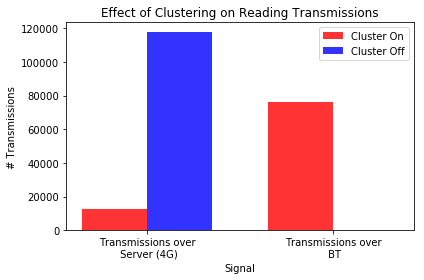

In [120]:
groups = 2
fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.35
opacity = 0.8
bar1 = plt.bar(index, cl_on, bar_width, alpha=opacity, color='r', label="Cluster On")
bar2 = plt.bar(index+bar_width, cl_off, bar_width, alpha=opacity, color='b', label="Cluster Off")

plt.xlabel('Signal')
plt.ylabel('# Transmissions')
plt.title('Effect of Clustering on Reading Transmissions')
plt.xticks(index + bar_width/2, ('Transmissions over\n Server (4G)', 'Transmissions over\n BT'))
plt.legend()

plt.tight_layout()
plt.show()

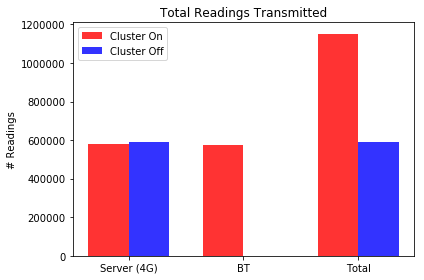

In [121]:
groups = 3
fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = 0.35
opacity = 0.8
bar1 = plt.bar(index, cl_on_bytes, bar_width, alpha=opacity, color='r', label="Cluster On")
bar2 = plt.bar(index+bar_width, cl_off_bytes, bar_width, alpha=opacity, color='b', label="Cluster Off")

plt.ylabel('# Readings')
plt.title('Total Readings Transmitted')
plt.xticks(index + bar_width/2, ('Server (4G)', 'BT', 'Total'))
plt.legend()

plt.tight_layout()
plt.show()

In [103]:
node_av_data_CON = [x[:] for x in [["0"] * 2] * 200]
with open("Log-nodes_alive_valid_CL_ON.txt") as f:
    raw_av_data_CON = f.readlines()
    
for i in range(0,200):
    node_av_data_CON[i] = raw_av_data_CON[i].split(',')
    node_av_data_CON[i][1] = (node_av_data_CON[i][1].split("\n"))[0]
    node_av_data_CON[i][0] = float((node_av_data_CON[i][0].split(":"))[1])
    node_av_data_CON[i][1] = float((node_av_data_CON[i][1].split(":"))[1])
    
node_av_data_COFF = [x[:] for x in [["0"] * 2] * 200]
with open("Log-nodes_alive_valid_CL_OFF.txt") as f:
    raw_av_data_COFF = f.readlines()
    
for i in range(0,200):
    node_av_data_COFF[i] = raw_av_data_COFF[i].split(',')
    node_av_data_COFF[i][1] = (node_av_data_COFF[i][1].split("\n"))[0]
    node_av_data_COFF[i][0] = float((node_av_data_COFF[i][0].split(":"))[1])
    node_av_data_COFF[i][1] = float((node_av_data_COFF[i][1].split(":"))[1])

In [104]:
percent_alive_CON = [0.0]*200
percent_alive_COFF = [0.0]*200
for i in range(0,200):
    try:
        percent_alive_CON[i] = (node_av_data_CON[i][1]/node_av_data_CON[i][0])*100
    except ZeroDivisionError:
        percent_alive_CON[i] = 1
    try:
        percent_alive_COFF[i] = (node_av_data_COFF[i][1]/node_av_data_COFF[i][0])*100
    except ZeroDivisionError:
        percent_alive_COFF[i] = 1

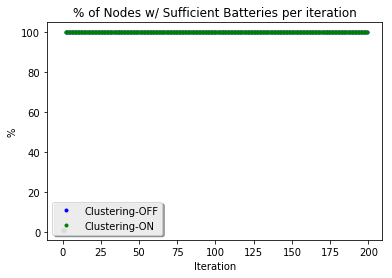

In [85]:
fig,ax = plt.subplots()
ax.plot(percent_alive_COFF,'b.',label="Clustering-OFF")
ax.plot(percent_alive_CON,'g.',label="Clustering-ON")
plt.title("% of Nodes w/ Sufficient Batteries per iteration")
plt.xlabel("Iteration")
plt.ylabel("%")
legend = ax.legend(loc='lower left', shadow=True)
plt.show()